# Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings("ignore")

In [84]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Loading the dataset

In [3]:
data= pd.read_csv('titanic_data.csv')
df=pd.DataFrame(data)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Categorical- sex, embarked
Continuous- Age, fare
Discrete- SibSp, Parch
Alphanumeric- Cabin

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


df.describe()

# Numerical Data Analysis

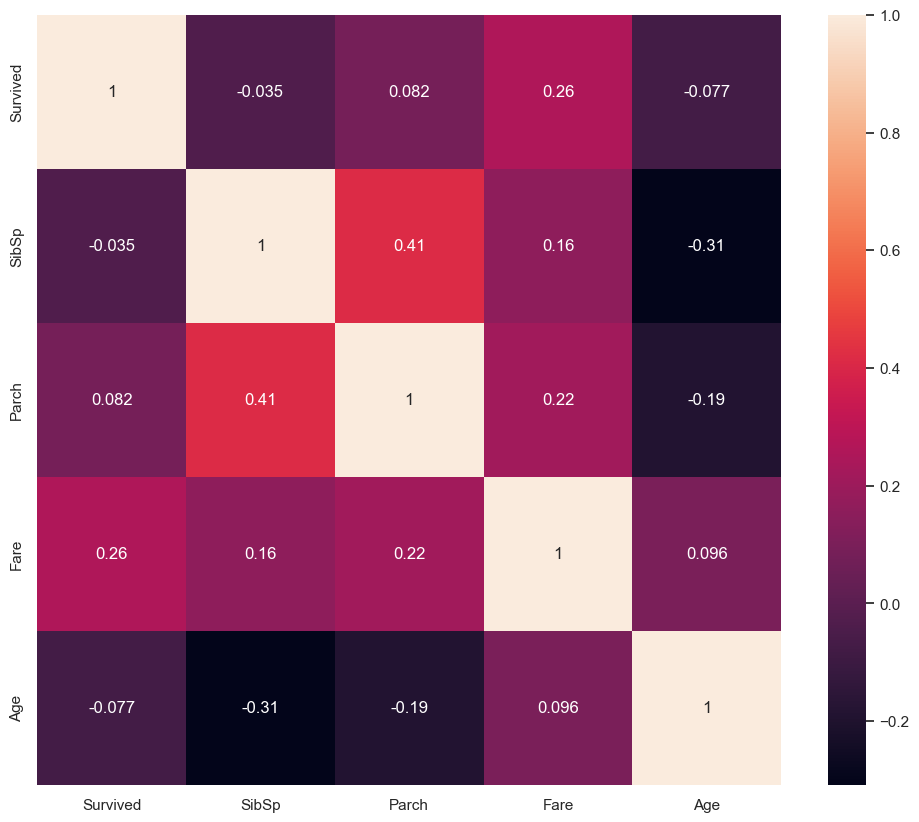

In [5]:
#plt.figure(figsize=(12,10))

heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Fare","Age"]].corr(), annot=True)

# sibsp- Number of siblings/ spouses aborard the titanic

In [6]:
df['SibSp'].nunique()

7

In [7]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

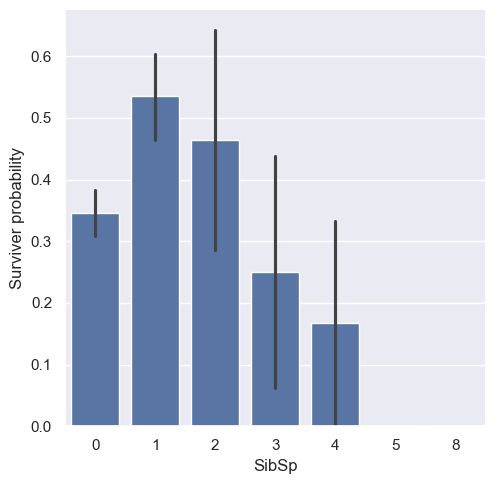

In [8]:
sns.catplot(x="SibSp", y="Survived", data= df, kind = "bar").set_ylabels("Surviver probability")

# Age

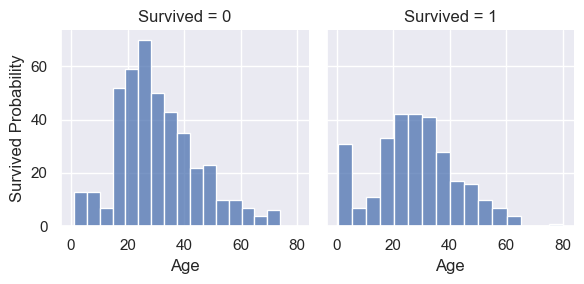

In [9]:
age_visual= sns.FacetGrid(df, col="Survived")
age_visual= age_visual.map(sns.histplot, "Age").set_ylabels("Survived Probability")

# Gender(Sex)

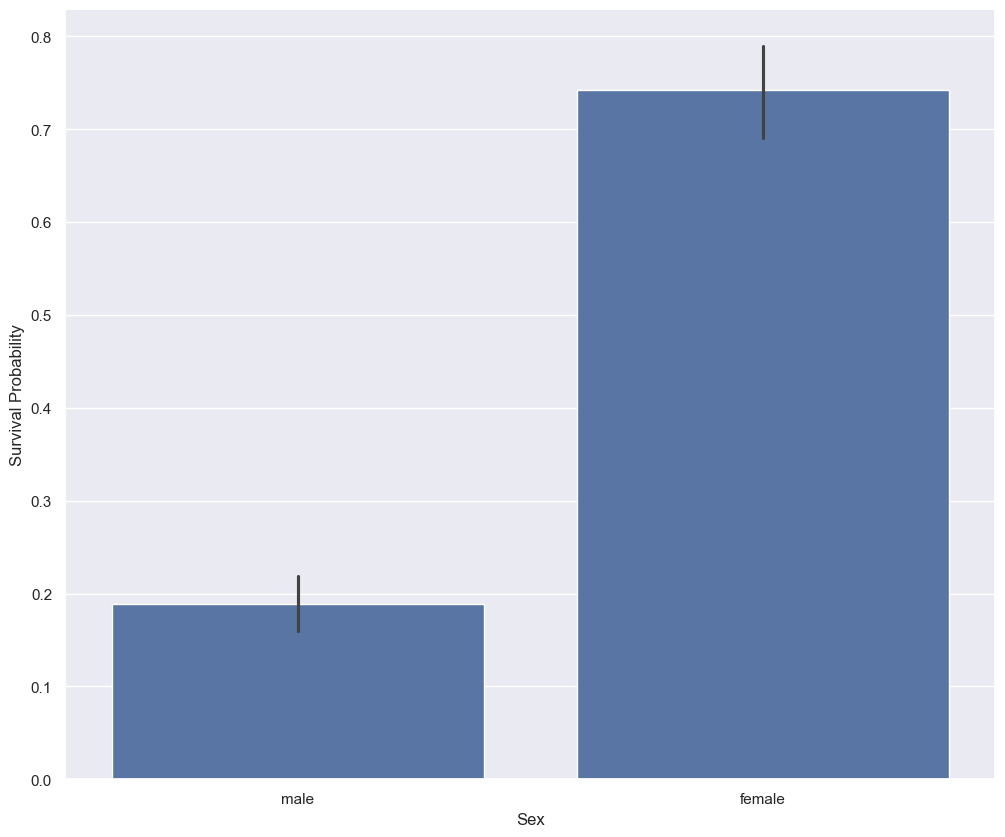

In [10]:
age_plot= sns.barplot(x="Sex", y="Survived", data=df).set_ylabel("Survival Probability")

In [11]:
df[['Sex', 'Survived']].groupby("Sex").mean()

,Survived
Sex,
female,0.742038
male,0.188908


# PClass

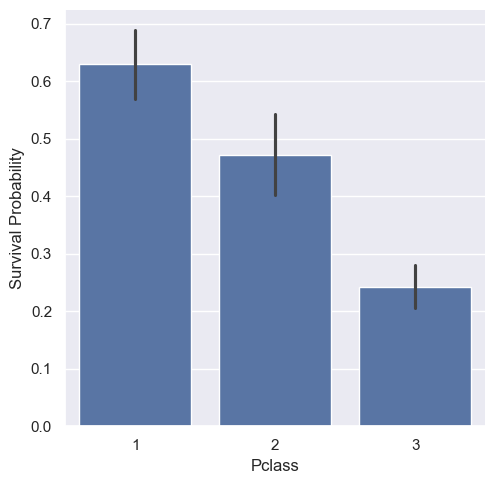

In [12]:
pclass=sns.catplot(x="Pclass", y="Survived", data=df, kind="bar")
pclass= pclass.set_ylabels("Survival Probability")

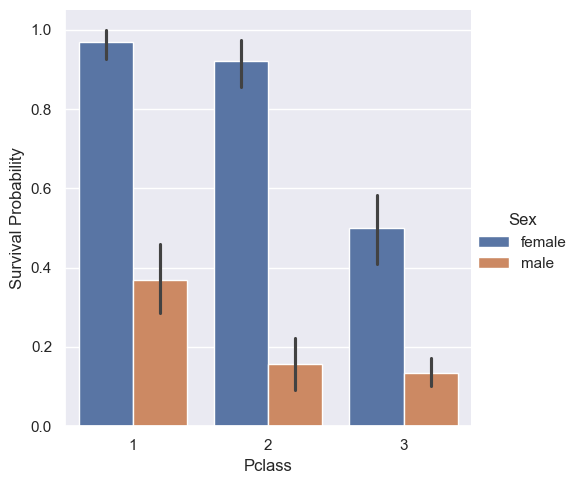

In [13]:
pclass=sns.catplot(x="Pclass", y="Survived", data=df, kind="bar",hue="Sex")
pclass= pclass.set_ylabels("Survival Probability")

# Embarked

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [16]:
data['Embarked']=data["Embarked"].fillna("S")

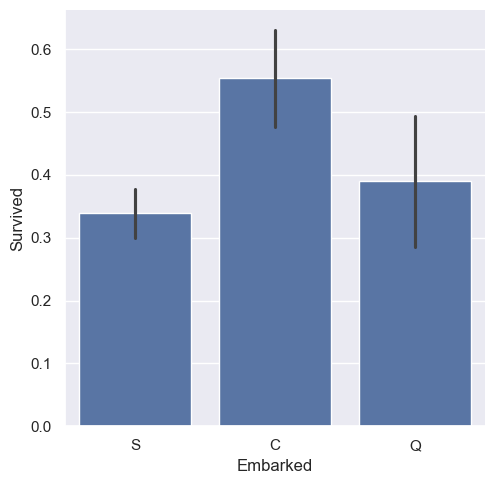

In [17]:
g=sns.catplot(x="Embarked", y="Survived", data=data, kind="bar")
g= pclass.set_ylabels("Survival Probability")

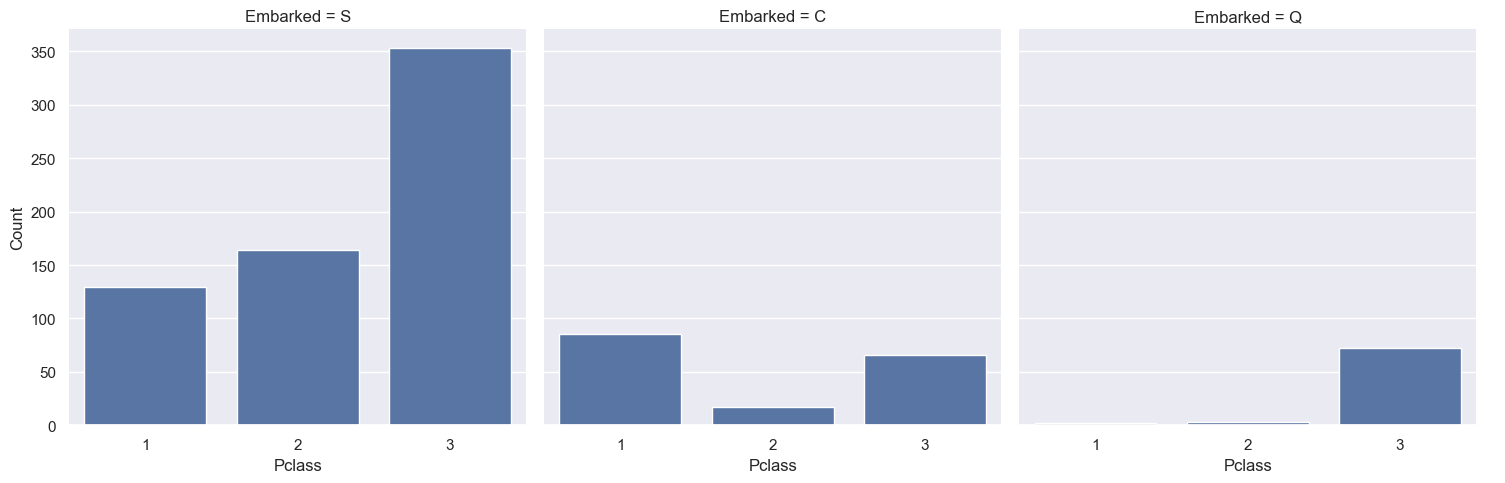

In [18]:
g=sns.catplot(x= "Pclass",col="Embarked", data=data, kind="count")
g.despine(left=True)
g= g.set_ylabels("Count")

# Preparing data

In [19]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
mean= df['Age'].mean()
std= df['Age'].std()

is_null=df['Age'].isnull().sum()

In [22]:
print(mean,std, is_null)

29.69911764705882 14.526497332334042 177


In [23]:
rand_age=np.random.randint(mean-std, mean+std, size=is_null)

In [24]:
rand_age

array([41, 38, 15, 19, 19, 36, 29, 28, 26, 28, 28, 16, 37, 43, 29, 21, 34,
       32, 22, 23, 39, 17, 40, 27, 21, 22, 32, 29, 17, 16, 18, 37, 34, 22,
       23, 17, 18, 43, 38, 23, 41, 35, 30, 22, 17, 43, 31, 24, 36, 34, 18,
       18, 34, 15, 33, 18, 31, 39, 40, 26, 27, 22, 27, 29, 29, 41, 17, 29,
       29, 22, 39, 26, 15, 32, 17, 37, 19, 24, 31, 18, 40, 37, 42, 38, 32,
       33, 41, 41, 40, 34, 33, 25, 16, 18, 20, 39, 35, 19, 33, 38, 41, 30,
       33, 40, 41, 24, 23, 37, 19, 17, 38, 42, 35, 34, 36, 35, 42, 35, 29,
       30, 22, 39, 24, 30, 39, 32, 38, 42, 26, 18, 23, 35, 37, 33, 39, 19,
       32, 34, 22, 28, 18, 26, 37, 34, 32, 31, 35, 39, 29, 35, 24, 25, 31,
       37, 26, 42, 41, 32, 39, 31, 27, 32, 41, 37, 30, 23, 40, 33, 30, 37,
       20, 32, 39, 42, 23, 26, 33])

In [25]:
a=df['Age'].copy()

a[np.isnan(a)]=rand_age
df['Age']=a

In [26]:
df['Age'].isnull().sum()

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
df['Embarked']=df['Embarked'].fillna('S')

In [29]:
col_to_drop=['PassengerId', 'Cabin', 'Ticket', 'Name']
df.drop(col_to_drop, axis=1, inplace=True)

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
genders={'male':0, 'female':1}
df['Sex']=data['Sex'].map(genders)

In [32]:
ports={'S':0, 'C':1, "Q":2}

df['Embarked']=data['Embarked'].map(ports)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


# Splitting the Data

In [35]:

X=df.drop(data.columns[[0]], axis=1)
y=df['Survived']

TypeError: 'method' object is not subscriptable

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, ytrain, xtest, ytest=train_test_split(x,y,test_size=0.3, random_state=0)
xtrain.reshape()
xtest.reshape()


# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
xtrain=sc_x.fit_transform(xtrain)
ytrain=sc_x.transform(xtest)

# classification

In [ ]:
logreg=LogisticRegression()
svc_classifier=SVC()
dt_classifier=DecisionTreeClassifier()
knn_classifier=KNeighborsClassifier()

rf_classifier=RandomForestClassifier(n_estimators=1000)

In [ ]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)

rf_classifier.fit(xtrain, ytrain)